# 7장 Analysis of variance and the Kruskal–Wallis test

- 이장의 목표
   - 1) 분산분석을 사용해서  3 그룹 이상 일때의 비교를 수행함.
   - 2) 비모수적인 방법인 Kruskal–Wallis test도 사용해봅니다.
   - 3) 일원분산분석 뿐만 아니라, 2월분산분석도 볼것입니다.
   
   
- 수식 표기법
    - https://en.wikibooks.org/wiki/LaTeX/Mathematics

## 7.1 One-way analysis of variance

![](chap07_01.png)

- 표기법 설명
    - $ x_{ij}$ 는 i번째 그룹의 j번째 관찰된 데이터를 의미
    - $ x_{35} $ 는 3번째 그룹의 5번째 관찰된 데이터를 나타냄.
    - $ \bar{x_i}$는 i번째 그룹의 평균이고, $ \bar{x}$ 는 전체 관찰된 데이터의 평균.


- 관찰된 값은 아래와 같이 분해를 할 수 있음.

$$ x_{ij} = \bar{x} + ( \bar{x_i}− \bar{x} ) + ( x_{ij} − \bar{x_i} ) $$

   - $ ( \bar{x_i}− \bar{x} ) $ 은 전체평균에서 그룹의 평균의 차이 => 그룹들간의 차이 => 그룹간(처리) 효과 
   - $ ( x_{ij} − \bar{x_i} ) $ 은 그룹의 평균에서 관찰값의 차이 => 그룹내의 차이 => 오차항

- 모델

$$ X_{ij} = \mu + \alpha_i + e_{ij}, \space\space\space\space\space\space\space e_{ij}   \sim  N(0, \sigma^2)  $$ 

### 변동의 분해
![](chap07_02.png)

### 분산분석표
![](chap07_03.png)

### R에서의 분산분석 방법
- 간단한 방법 : lm()함수
- 좀더 정교한 방법 : aov(), lme() 
- 분산이 동일하지 않을 경우 : oneway.test()

### Red cell folate (적혈구의 엽산) 데이터로 분산분석(  lm 이용 )

In [ ]:
# ISwR 패키지는 한번만 설치하면 됨.
#install.packages(c('ISwR'),  repos="http://cran.nexr.com/"  )

In [1]:
library(ISwR)

In [2]:
attach(red.cell.folate)
summary(red.cell.folate)

     folate          ventilation
 Min.   :206.0   N2O+O2,24h:8   
 1st Qu.:249.5   N2O+O2,op :9   
 Median :274.0   O2,24h    :5   
 Mean   :283.2                  
 3rd Qu.:305.5                  
 Max.   :392.0                  

- red.cell.folate 데이터는 folate 라는 연속형 변수와  ventilation라는 범주형 데이터를 갖음.
- ventilation범주는 3개 그룹으로 구성되고  ventilation에 따른 folate값에 대한 영향이 있는지 여부를 알아보고자 함.

In [3]:
redcell.lm <- lm(folate~ventilation)
summary( redcell.lm  )


Call:
lm(formula = folate ~ ventilation)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.625 -35.361  -4.444  35.625  75.375 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            316.62      16.16  19.588 4.65e-14 ***
ventilationN2O+O2,op   -60.18      22.22  -2.709   0.0139 *  
ventilationO2,24h      -38.62      26.06  -1.482   0.1548    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45.72 on 19 degrees of freedom
Multiple R-squared:  0.2809,	Adjusted R-squared:  0.2052 
F-statistic: 3.711 on 2 and 19 DF,  p-value: 0.04359


In [4]:
anova( redcell.lm )

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ventilation,2,15515.77,7757.883,3.711336,0.04358933
Residuals,19,39716.1,2090.321,NA,NA


- 분산분석표를 해석해보자. ~~~
- p-Value 가 0.05보다 작아서 모든 그룹에서 분산이 동일하다는 귀무가설을 기각하므로 그룹간의 분산은 다르다. => 여기서는 3그룹이 있고, 이중에 하나의 그룹이라도 다른 그룹과 분산이 다른다라고 해석함.
- 어떤 그룹이 그룹이 다른지는 다른 분석방법을 적용함.

### juul 데이터셋로 분산분석

In [7]:
attach(juul)
anova(lm(igf1~tanner))

The following objects are masked from juul (pos = 3):

    age, igf1, menarche, sex, tanner, testvol



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
tanner,1,10985605,10985605,686.0723,2.420587e-109
Residuals,790,12649728,16012.31,NA,NA


- 이와 같이 하면 잘못되었음.
- 분산분석은 그룹별( 범주형 변수)에 따른 효과(연속형 변수)의 차이를 알아보기 위한 방법임.
- tanner는 이 데이터셋에 연속형 변수 형식으로 저장되어서 lm()을 하면 선형회귀를 값을 구함.

In [8]:
summary( juul )

      age            menarche          sex             igf1      
 Min.   : 0.170   Min.   :1.000   Min.   :1.000   Min.   : 25.0  
 1st Qu.: 9.053   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:202.2  
 Median :12.560   Median :1.000   Median :2.000   Median :313.5  
 Mean   :15.095   Mean   :1.476   Mean   :1.534   Mean   :340.2  
 3rd Qu.:16.855   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:462.8  
 Max.   :83.000   Max.   :2.000   Max.   :2.000   Max.   :915.0  
 NA's   :5        NA's   :635     NA's   :5       NA's   :321    
     tanner        testvol      
 Min.   :1.00   Min.   : 1.000  
 1st Qu.:1.00   1st Qu.: 1.000  
 Median :2.00   Median : 3.000  
 Mean   :2.64   Mean   : 7.896  
 3rd Qu.:5.00   3rd Qu.:15.000  
 Max.   :5.00   Max.   :30.000  
 NA's   :240    NA's   :859     

- tanner변수를 범주형변수로 변환

In [10]:
juul$tanner2 <- factor( juul$tanner,  labels=c("I","II","III","IV","V") )
summary( juul$tanner2  )

I   II  III   IV    V NA's 
 515  103   72   81  328  240

In [12]:
detach(juul)
attach(juul)
anova(lm(igf1~tanner2))

The following objects are masked from juul (pos = 3):

    age, igf1, menarche, sex, tanner, testvol



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
tanner2,4,12696217,3174054,228.3531,4.678213e-130
Residuals,787,10939116,13899.77,NA,NA


- tanner변수의 자유도가 4이므로 5그룹으로 나누어서 그룹별 차이가 있는지 잘 분석하고 있음.
- p-value의 해석 ~~~~~~~

## 7.1.1 Pairwise comparisons and multiple testing

- F-검정은 그룹들간의 차이가 있는지 여부를 확인.
- 개별 그룹간의 비교가 필요함.
- 회귀분석의 coefficients 항목에서 그룹간의 비교 정보 일부를 알 수 있음

In [13]:
summary(lm(folate~ventilation))


Call:
lm(formula = folate ~ ventilation)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.625 -35.361  -4.444  35.625  75.375 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            316.62      16.16  19.588 4.65e-14 ***
ventilationN2O+O2,op   -60.18      22.22  -2.709   0.0139 *  
ventilationO2,24h      -38.62      26.06  -1.482   0.1548    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45.72 on 19 degrees of freedom
Multiple R-squared:  0.2809,	Adjusted R-squared:  0.2052 
F-statistic: 3.711 on 2 and 19 DF,  p-value: 0.04359


- 위의 결과의 해석은 ventilationN2O+O2,24h을 기준으로 ventilationN2O+O2,op 과 ventilationO2,24h의 효과에 대한 결과이므로 
- p-value 0.0139은 N2O+O2,24h과 N2O+O2,op 의 차이에 대한 값이고
- p-value 0.1548는 N2O+O2,24h과 O2,24h 의 차이에 대한 값
- 여기에서는 N2O+O2,op과 O2,24h에 차이에 대한 값은 없음.
- 그룹이 많이 있으면, 여러번 lm()함수를 돌려야 하므로, 한번에 그룹간 차이 여부를 확인하는 방법이 필요함.

### pairwise.t.test
- 이것은 여러 그룹이 있을때, 가능한 모든 그룹간의 비교를 수행함. 
- 그룹간 분산이 동일하다고 생각할 수 없기 때문에 분산의 보정은 bonferroni 로 설정함.

In [14]:
pairwise.t.test(folate, ventilation, p.adj="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  folate and ventilation 

          N2O+O2,24h N2O+O2,op
N2O+O2,op 0.042      -        
O2,24h    0.464      1.000    

P value adjustment method: bonferroni 

##  7.1.2 Relaxing the variance assumption

- 전통적인 anova()함수를 그룹간의 분산이 동일하다는 가정을 하고 있음
- oneway.test()함수는 그룹간의 분산이 동일하지 않을때 사용함.

In [15]:
oneway.test(folate~ventilation)


	One-way analysis of means (not assuming equal variances)

data:  folate and ventilation
F = 2.9704, num df = 2.000, denom df = 11.065, p-value = 0.09277


In [16]:
anova( lm(folate~ventilation) )

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ventilation,2,15515.77,7757.883,3.711336,0.04358933
Residuals,19,39716.1,2090.321,NA,NA


- pairwise.t.test()함수는 그룹간 분산이 동일하다고 수행하기 때문에 pool.sd=F 로 해야지만 분산이 다르다고 가정함.

In [17]:
pairwise.t.test( folate,ventilation, pool.sd=F )


	Pairwise comparisons using t tests with non-pooled SD 

data:  folate and ventilation 

          N2O+O2,24h N2O+O2,op
N2O+O2,op 0.087      -        
O2,24h    0.321      0.321    

P value adjustment method: holm 

- ** 이와 같이 분산(variances)에 대한 동일하다는 조건을 제거하면, 이전과 아주 다른 결과가 나옴. **

### 7.1.3 Graphical presentation

N2O+O2,24h  N2O+O2,op     O2,24h 
  20.75963   12.37393   15.09636

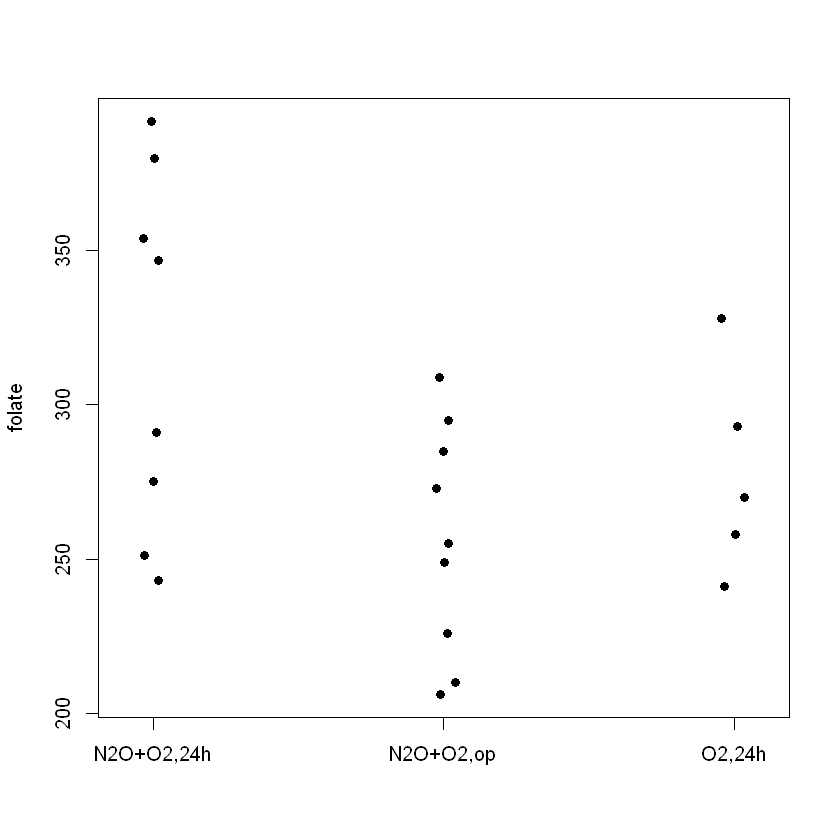

In [20]:
xbar <- tapply(folate, ventilation, mean)
s <- tapply(folate, ventilation, sd)
n <- tapply(folate, ventilation, length)
sem <- s/sqrt(n)
sem
stripchart(folate~ventilation, method="jitter", jitter=0.05, pch=16, vert=T)

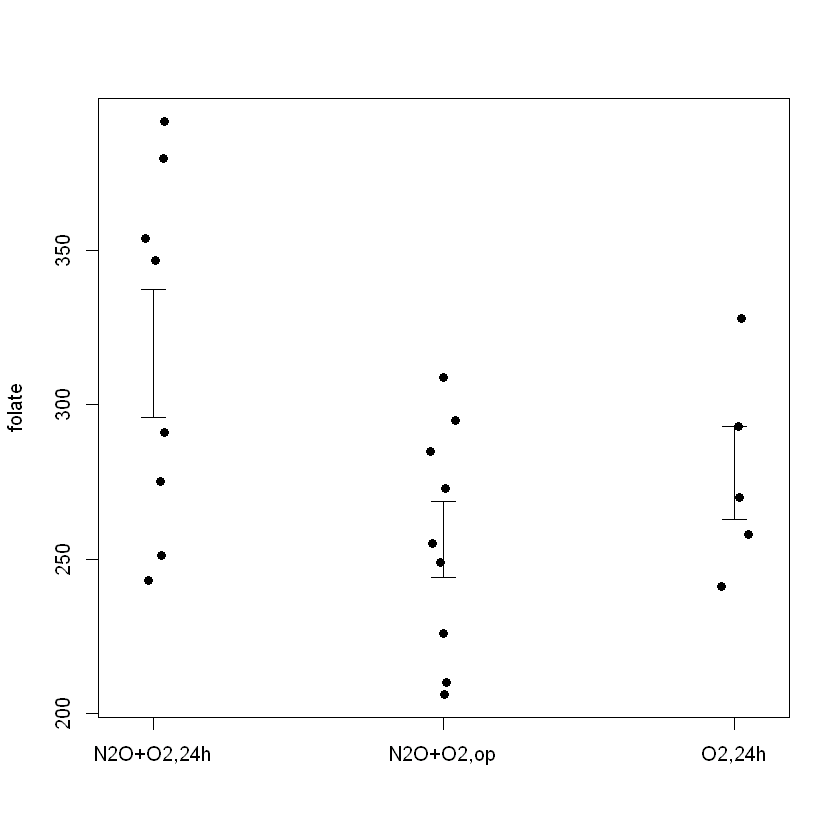

In [22]:
stripchart(folate~ventilation, method="jitter", jitter=0.05, pch=16, vert=T)
arrows(1:3,xbar+sem,1:3,xbar-sem,angle=90,code=3,length=.1)

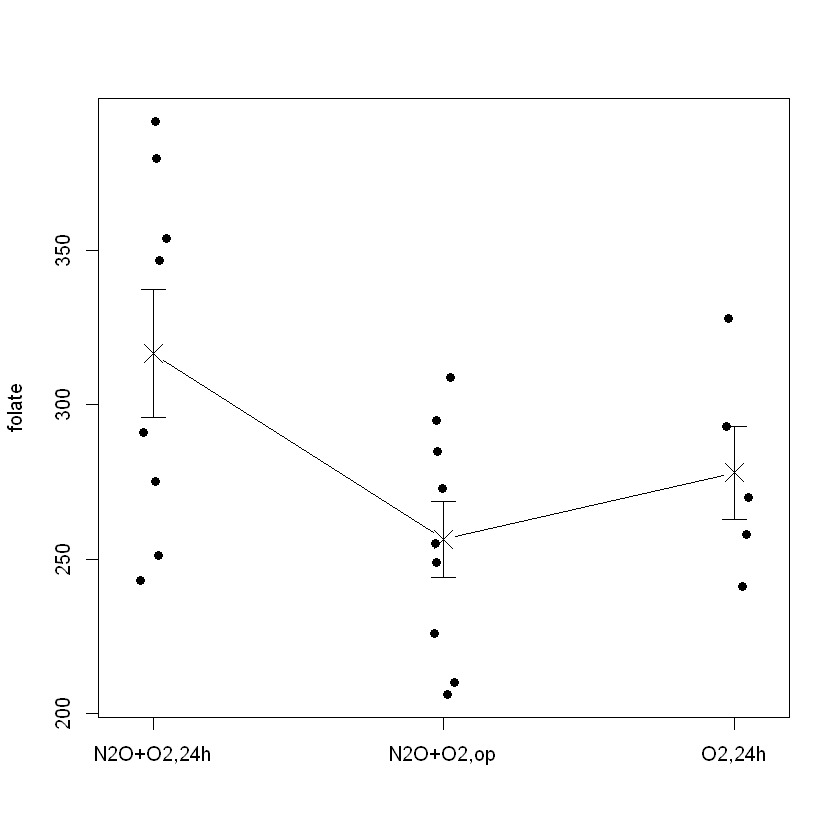

In [23]:
stripchart(folate~ventilation, method="jitter", jitter=0.05, pch=16, vert=T)
arrows(1:3,xbar+sem,1:3,xbar-sem,angle=90,code=3,length=.1)
lines(1:3,xbar,pch=4,type="b",cex=2)

### 7.1.4 Bartlett’s test

- Bartlett 검정은 모든 그룹들이 같은 분산을 갖는지 여부를 확인함.

In [24]:
bartlett.test(folate~ventilation)


	Bartlett test of homogeneity of variances

data:  folate by ventilation
Bartlett's K-squared = 2.0951, df = 2, p-value = 0.3508


- 그룹간 분산이 동일하다는 귀무가설을 기각하기 못하므로, 그룹간 분산은 동일함.

## 7.2 Kruskal–Wallis test

- 분산분석에서 비모수적인 방법으로 Kruskal–Wallis test가 있음.
- Wilcoxon two-sample test과 같이 그룹간에 상관없이 데이터를 순위로 대체함.

In [25]:
kruskal.test(folate~ventilation)


	Kruskal-Wallis rank sum test

data:  folate by ventilation
Kruskal-Wallis chi-squared = 4.1852, df = 2, p-value = 0.1234


- 이 검정을 사용하면 그룹간 차이가 없다라고 나옴.
- 모수적인 가정이 있다면, 검정력이 다소 떨어짐.

### 요점 정리 => 데이터에 대한 사전 지식이 있어야지만, 분석을 잘 할 수 있음.

##  7.3 Two-way analysis of variance

- 2가지 그룹변수에 대한 분산분석
- 여기서는 반복이 없는 경우임.
![](chap07_01.png)

- 표기법 설명
    - $ x_{ij}$ 는 i번째 열의 j번째 행의 관찰된 데이터를 의미
    - $ \bar{x_{i.}}$ 는 i번째 열의 평균
    - $ \bar{x_{.j}} $ 는 j번째 행의 평균
    - $ \bar{x_{..}} $ 는 전체 평균

- 변동의 분해
![](chap07_04.png)

- 모델

$$ X_{ij} = \mu + \alpha_i + \beta_j + e_{ij}, \space\space\space\space\space\space\space e_{ij}   \sim  N(0, \sigma^2)  $$ 

- 이원분산분석표
![](chap07_05.png)

- heart.rate 데이터셋로 이원 분산분석

In [29]:
summary(heart.rate)
head( heart.rate )

       hr              subj     time  
 Min.   : 67.00   1      : 4   0  :9  
 1st Qu.: 78.75   2      : 4   30 :9  
 Median : 93.00   3      : 4   60 :9  
 Mean   : 93.14   4      : 4   120:9  
 3rd Qu.:104.50   5      : 4          
 Max.   :128.00   6      : 4          
                  (Other):12          

,hr,subj,time
1,96,1,0
2,110,2,0
3,89,3,0
4,95,4,0
5,128,5,0
6,100,6,0


The following objects are masked from heart.rate (pos = 3):

    hr, subj, time

The following objects are masked from heart.rate (pos = 4):

    hr, subj, time

The following objects are masked from heart.rate (pos = 5):

    hr, subj, time



```
heart.rate은 아래와 같은 코드로 만들어진 데이터임. 
heart.rate <- data.frame(hr = c(96,110,89,95,128,100,72,79,100,
                                92,106,86,78,124,98,68,75,106,
                                86,108,85,78,118,100,67,74,104,
                                92,114,83,83,118,94,71,74,102),
                                subj=gl(9,1,36),
                                time=gl(4,9,36,labels=c(0,30,60,120)))
```

In [30]:
gl(9,1,36)

[1] 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9
Levels: 1 2 3 4 5 6 7 8 9

- 9개의 데이터를 1개씩 사용해서 36개의 데이터를 생성 

In [31]:
gl(4,9,36,labels=c(0,30,60,120))

[1] 0   0   0   0   0   0   0   0   0   30  30  30  30  30  30  30  30  30  60 
[20] 60  60  60  60  60  60  60  60  120 120 120 120 120 120 120 120 120
Levels: 0 30 60 120

- 4개의 데이터를 9번씩 사용해서 36개의 데이터를 생성

In [32]:
attach(heart.rate)
anova( lm( hr ~ subj + time, data = heart.rate ) )

The following objects are masked from heart.rate (pos = 3):

    hr, subj, time

The following objects are masked from heart.rate (pos = 4):

    hr, subj, time

The following objects are masked from heart.rate (pos = 5):

    hr, subj, time

The following objects are masked from heart.rate (pos = 6):

    hr, subj, time



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
subj,8,8966.556,1120.819,90.63909,4.86268e-16
time,3,150.9722,50.32407,4.069637,0.01802047
Residuals,24,296.7778,12.36574,NA,NA


### 7.3.1 Graphics for repeated measurements

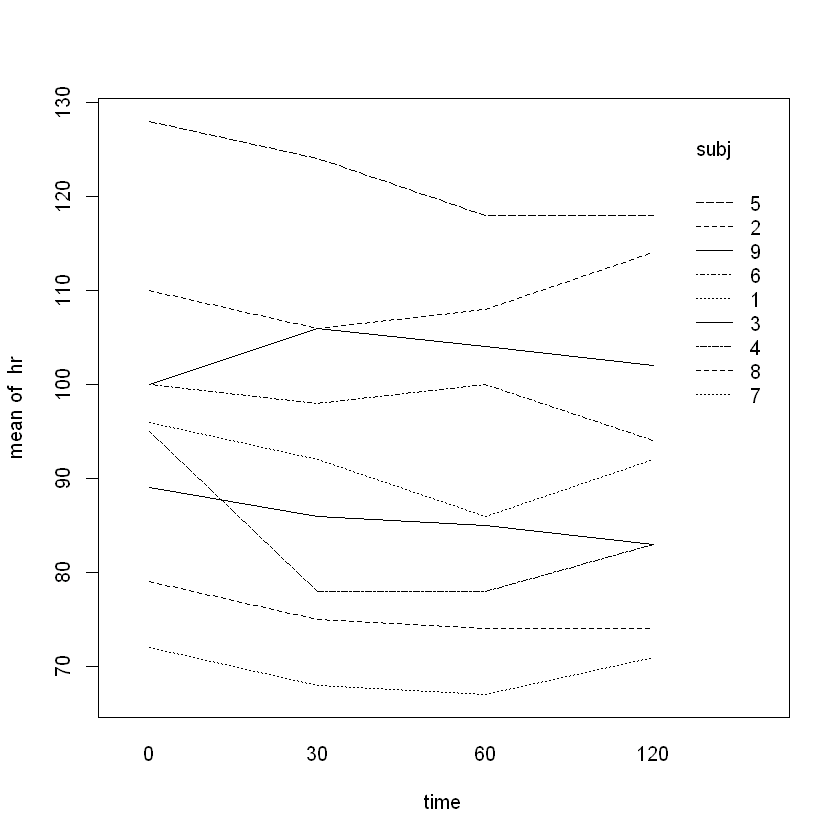

In [33]:
interaction.plot(time, subj, hr)

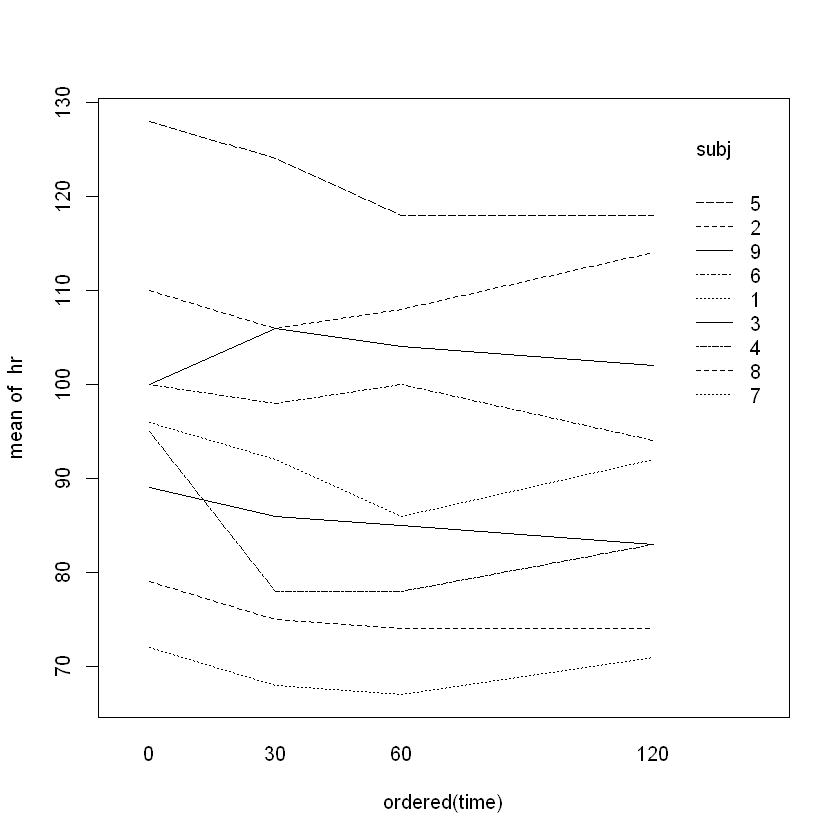

In [34]:
interaction.plot(ordered(time),subj,hr)

## 7.4 The Friedman test

In [35]:
friedman.test(hr~time|subj,data=heart.rate)


	Friedman rank sum test

data:  hr and time and subj
Friedman chi-squared = 8.5059, df = 3, p-value = 0.03664


In [36]:
friedman.test(hr~subj|time,data=heart.rate)


	Friedman rank sum test

data:  hr and subj and time
Friedman chi-squared = 31.698, df = 8, p-value = 0.0001055
